In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns=1000
sns.set_theme()

In [3]:
df = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/df.csv')

In [4]:
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,001-1,Gears,1965,1,43,5,5,Technic,24696,132a,7,4,Light Gray,Tyre Smooth Old Style - Small,0,7,4,10,29,0
1,001-1,Gears,1965,1,43,5,5,Technic,24696,3020,15,4,White,Plate 2 x 4,0,7,4,5,11,0
2,001-1,Gears,1965,1,43,5,5,Technic,24696,3062c,15,1,White,"Brick Round 1 x 1 Solid Stud, No Bottom Groove",0,7,5,5,46,0
3,001-1,Gears,1965,1,43,5,5,Technic,24696,3404bc01,15,4,White,"Turntable 4 x 4 - Old Type Complete, Perfectly...",0,7,8,5,52,0
4,001-1,Gears,1965,1,43,5,5,Technic,24696,36,7,4,Light Gray,Tyre Smooth Old Style - Large,0,7,2,10,29,0


In [5]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [6]:
df.shape

(919288, 20)

In [7]:
target_names = 'set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len'.split()
target_names

['set_num',
 'set_name',
 'theme_id',
 'theme_name',
 'id',
 'part_num',
 'color_name',
 'part_name',
 'theme_name_len']

In [8]:
# define the dataset
fn = list()
for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [9]:
fn

['year',
 'num_parts',
 'set_num_len',
 'set_name_len',
 'color_id',
 'quantity',
 'is_trans',
 'part_num_len',
 'color_name_len',
 'part_name_len',
 'is_ninjago']

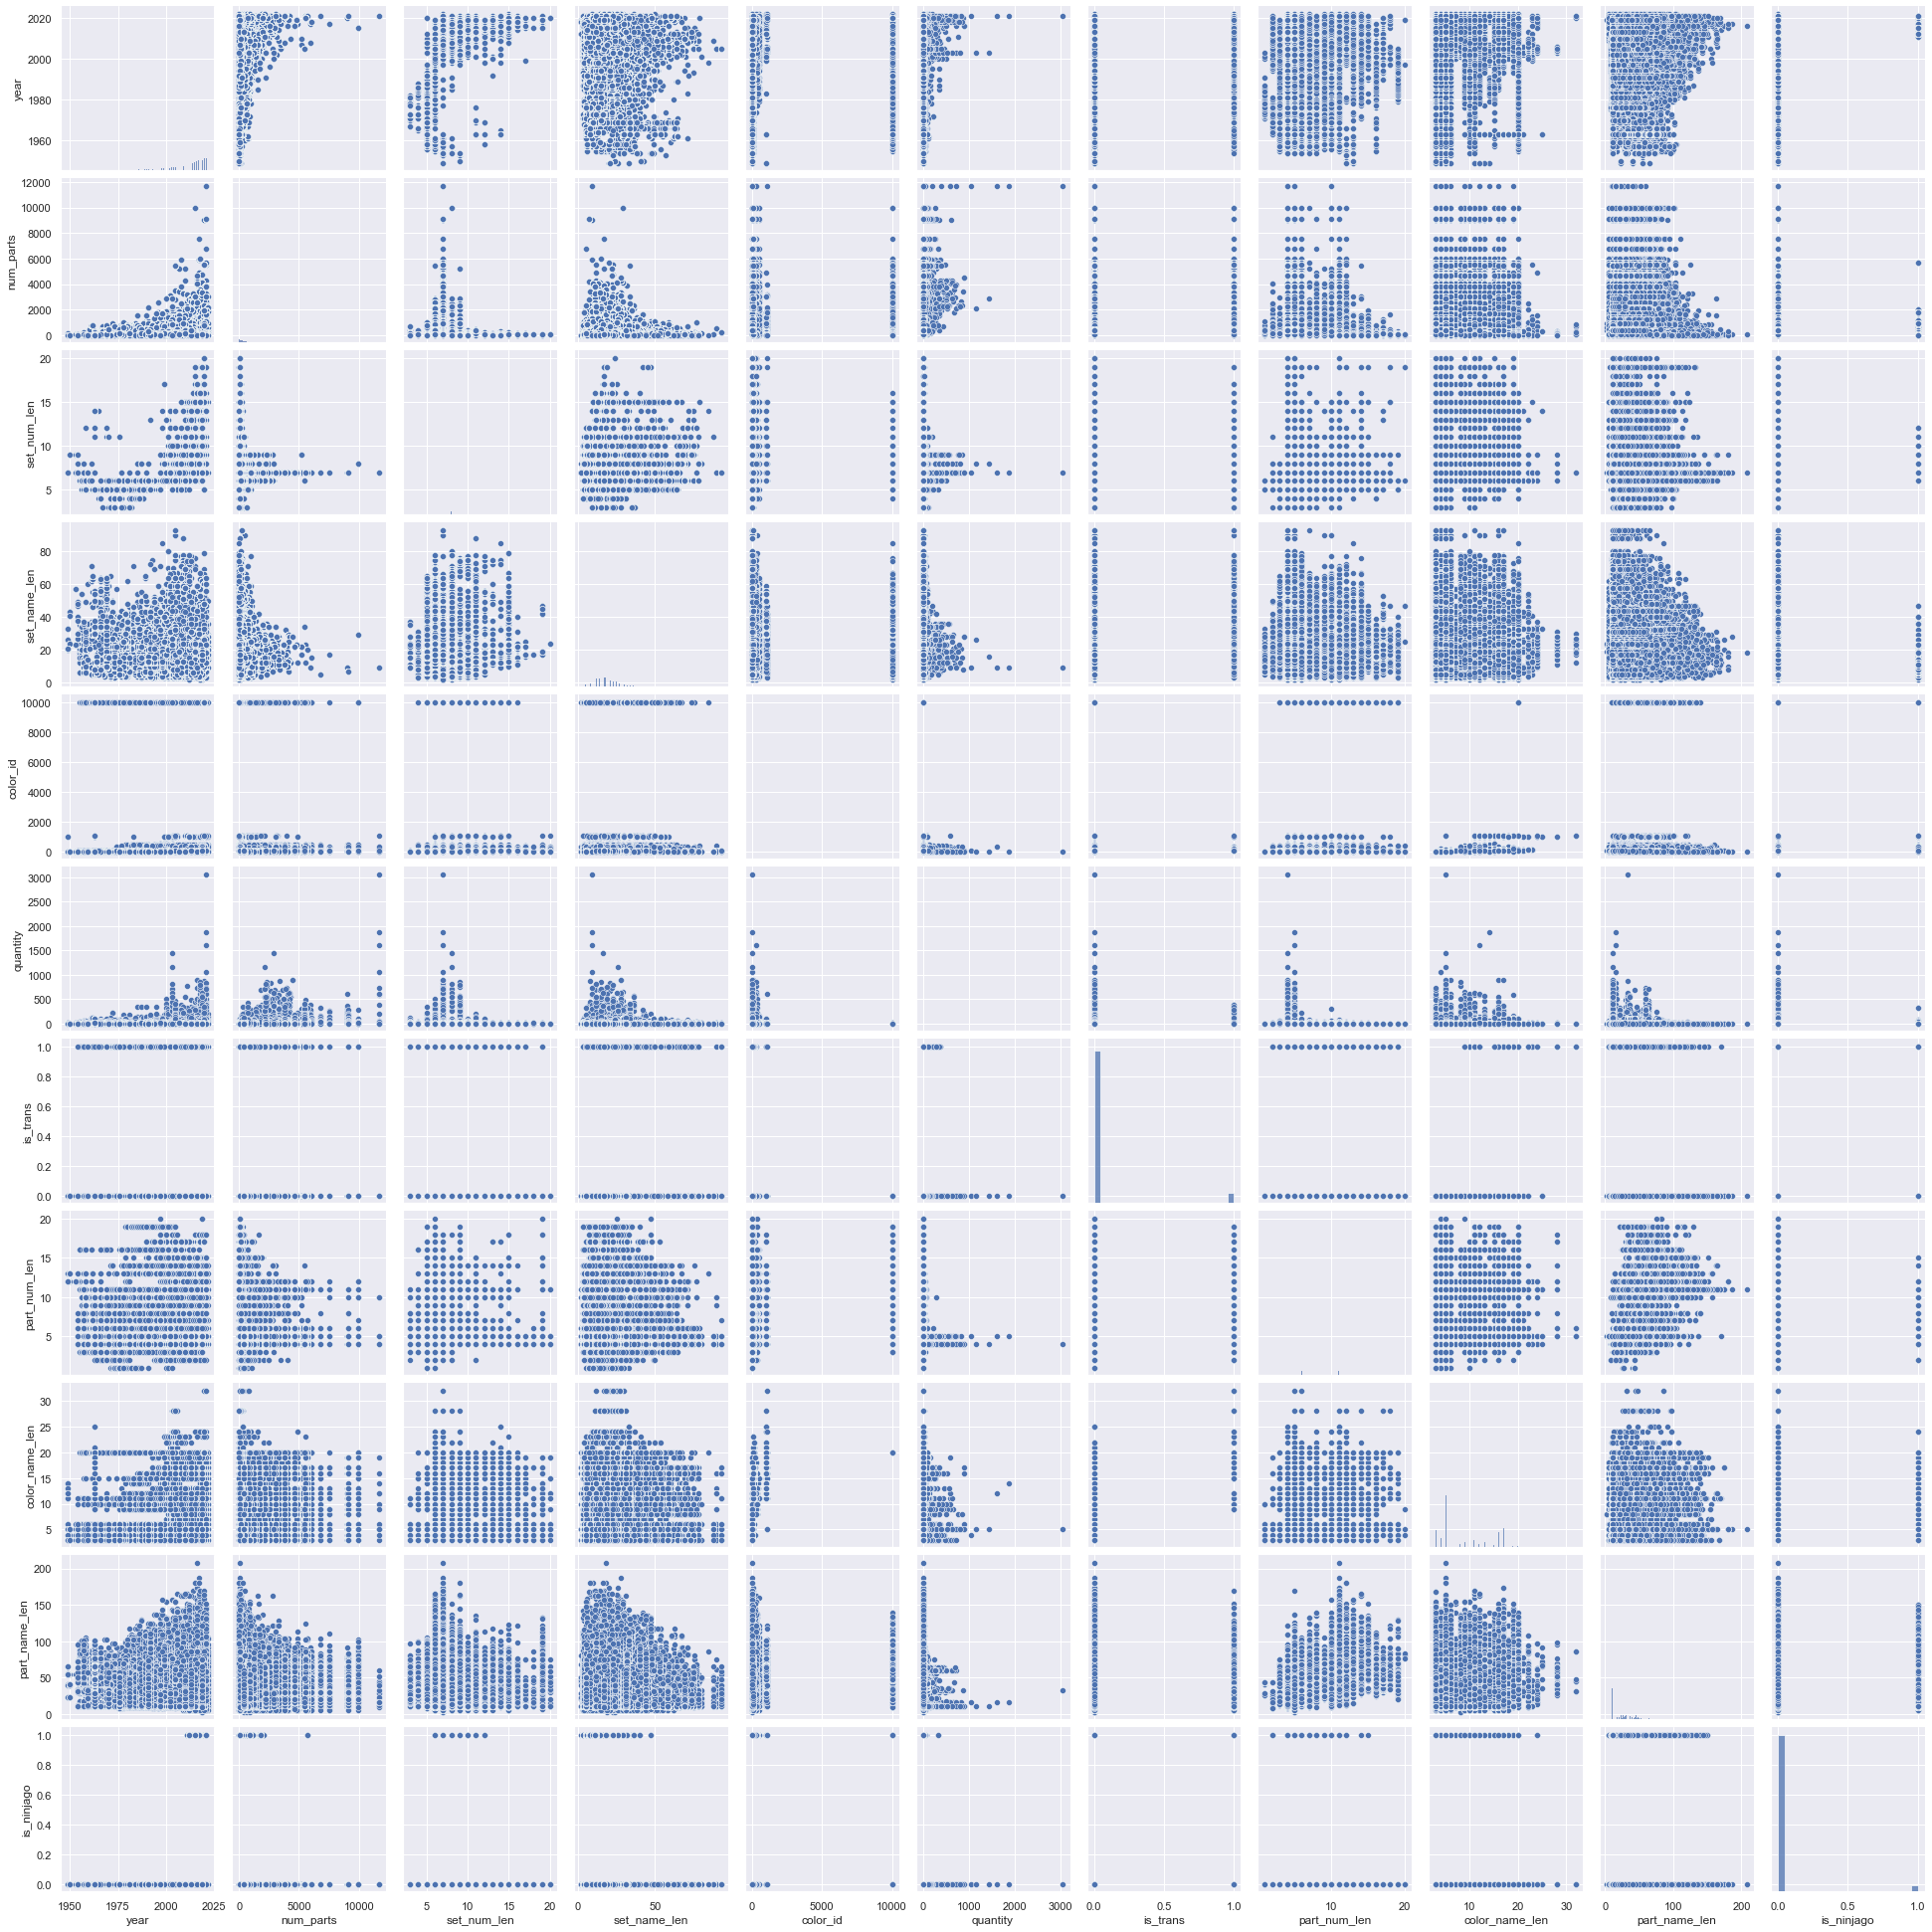

In [10]:
sns.pairplot(df[fn])

In [11]:
sets = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/csvs/sets.csv')

In [12]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [13]:
sets['set_name_len'] = sets['name'].str.len()
sets.head()

,set_num,name,year,theme_id,num_parts,set_name_len
0,001-1,Gears,1965,1,43,5
1,0011-2,Town Mini-Figures,1979,67,12,17
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,26
3,0012-1,Space Mini-Figures,1979,143,12,18
4,0013-1,Space Mini-Figures,1979,143,12,18


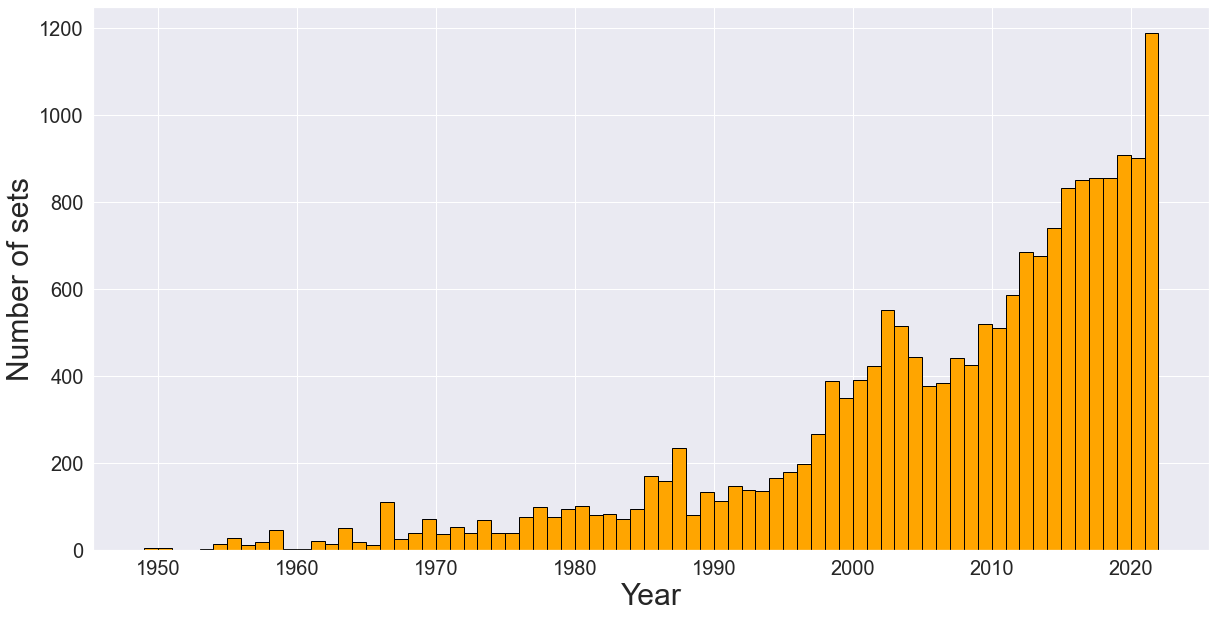

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
bins = sets['year'].max() - sets['year'].min()
ax.hist(sets['year'], bins=bins, color='orange', edgecolor='black', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Number of sets', fontsize=30)
plt.show()

In [15]:
df['num_parts'].max()

11695

array([[<AxesSubplot:title={'center':'num_parts'}>]], dtype=object)

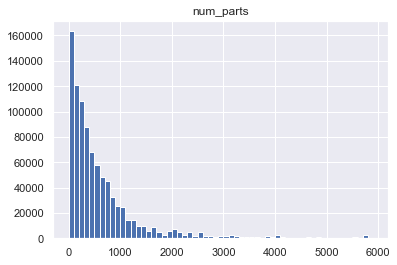

In [16]:
df.hist(column='num_parts', bins=range(0, 6000, 100))

In [17]:
df.head(1)

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,001-1,Gears,1965,1,43,5,5,Technic,24696,132a,7,4,Light Gray,Tyre Smooth Old Style - Small,0,7,4,10,29,0


In [18]:
df_1 = sets[sets['theme_id']==435]
df_1.head()

,set_num,name,year,theme_id,num_parts,set_name_len
806,111901-1,Garmadon,2019,435,10,8
807,111902-1,Wu,2019,435,6,2
808,111903-1,Kai vs. Wyplash,2019,435,13,15
809,111904-1,Jay vs. Lasha,2019,435,12,13
813,112005-1,Cole vs. Nindroid,2020,435,20,17


In [19]:
df_1.shape

(417, 6)

In [20]:
df_0 = sets[sets['theme_id']!=435]
df_0.head()

,set_num,name,year,theme_id,num_parts,set_name_len
0,001-1,Gears,1965,1,43,5
1,0011-2,Town Mini-Figures,1979,67,12,17
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,26
3,0012-1,Space Mini-Figures,1979,143,12,18
4,0013-1,Space Mini-Figures,1979,143,12,18


In [21]:
df_1_full = df[df['is_ninjago']==1]
df_0_full = df[df['is_ninjago']==0]

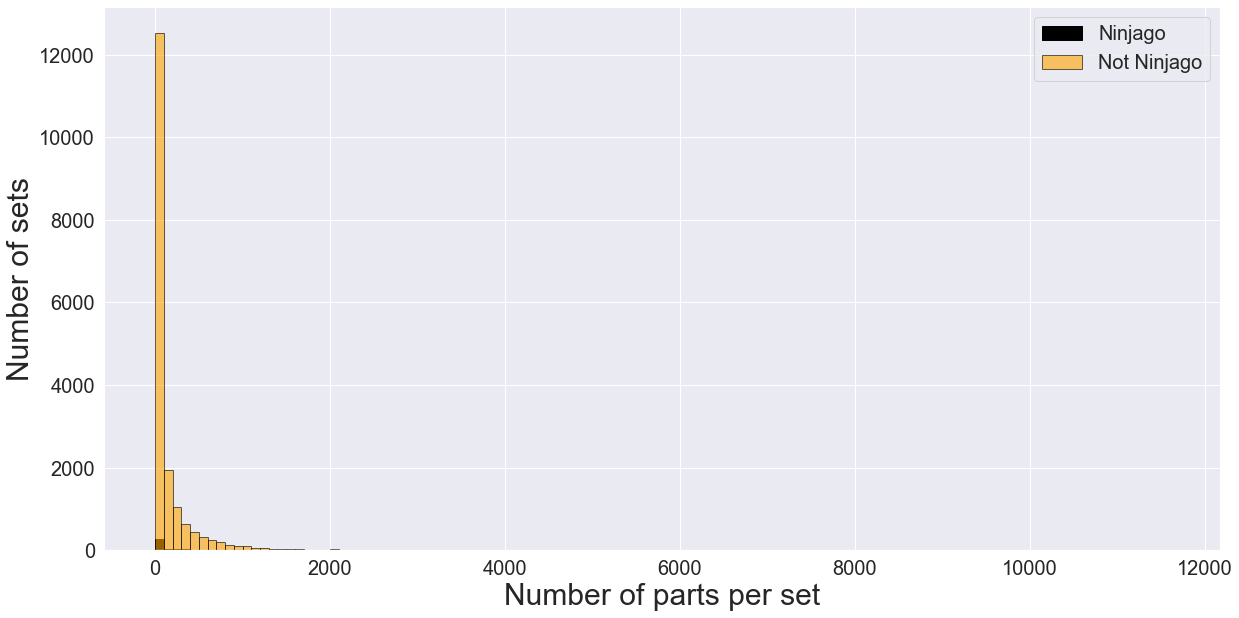

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
bins1 = range(df_1['num_parts'].min(), df_1['num_parts'].max(), 100)
bins2 = range(df_0['num_parts'].min(), df_0['num_parts'].max(), 100)
ax.hist(df_1['num_parts'], label='Ninjago', bins=bins1, color='black', edgecolor='black', linewidth=1)
ax.hist(df_0['num_parts'], label='Not Ninjago', bins=bins2, color='orange', alpha=0.6, edgecolor='black', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('Number of parts per set', fontsize=30)
ax.set_ylabel('Number of sets', fontsize=30)
ax.legend(fontsize=20)
plt.show()

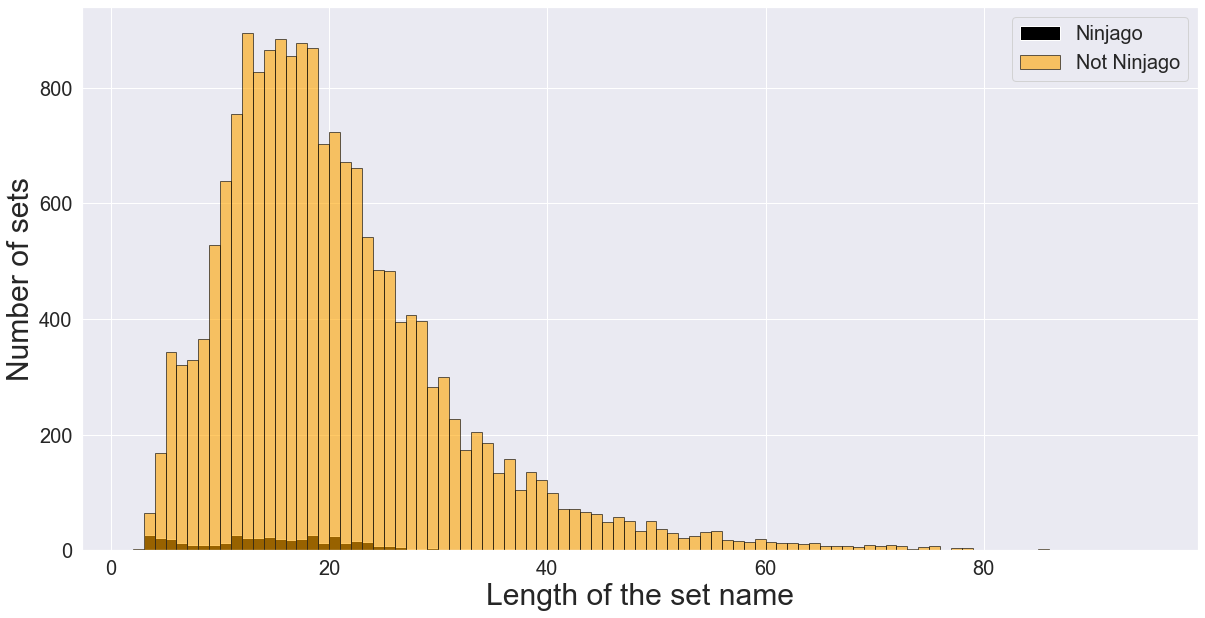

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
bins1 = df_1['set_name_len'].max() - df_1['set_name_len'].min()
bins2 = df_0['set_name_len'].max() - df_0['set_name_len'].min()
ax.hist(df_1['set_name_len'], label='Ninjago', color='black', bins=bins1)
ax.hist(df_0['set_name_len'], label='Not Ninjago', color='orange', alpha=0.6, bins=bins2, edgecolor='black', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('Length of the set name', fontsize=30)
ax.set_ylabel('Number of sets', fontsize=30)
ax.legend(fontsize=20)
plt.show()

In [24]:
df_0.shape

(18090, 6)

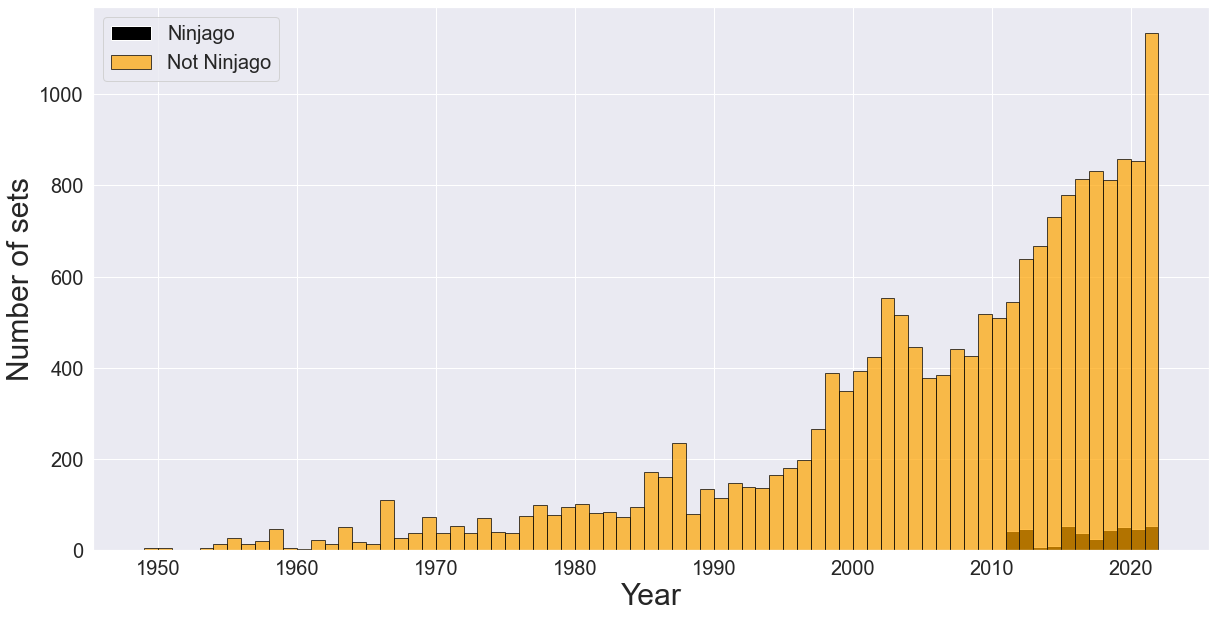

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
bins1 = df_1['year'].max() - df_1['year'].min()
bins2 = df_0['year'].max() - df_0['year'].min()
ax.hist(df_1['year'], label='Ninjago', color='black', bins=bins1)
ax.hist(df_0['year'], label='Not Ninjago', color='orange', alpha=0.7, bins=bins2, edgecolor='black', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Number of sets', fontsize=30)
ax.legend(fontsize=20)
plt.show()

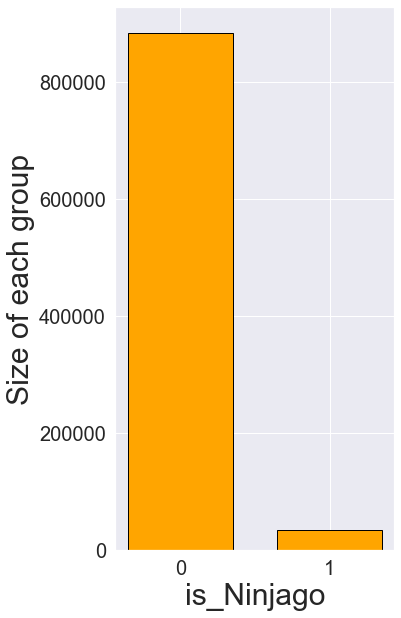

In [26]:
fig, ax = plt.subplots(figsize=(5,10))
bins = np.arange(3) - 0.5
ax.hist(df['is_ninjago'], bins=bins, rwidth=0.7, color='orange', edgecolor='black', linewidth=1)
plt.xticks([0, 1], fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('is_Ninjago', fontsize=30)
ax.set_ylabel('Size of each group', fontsize=30)
plt.show()

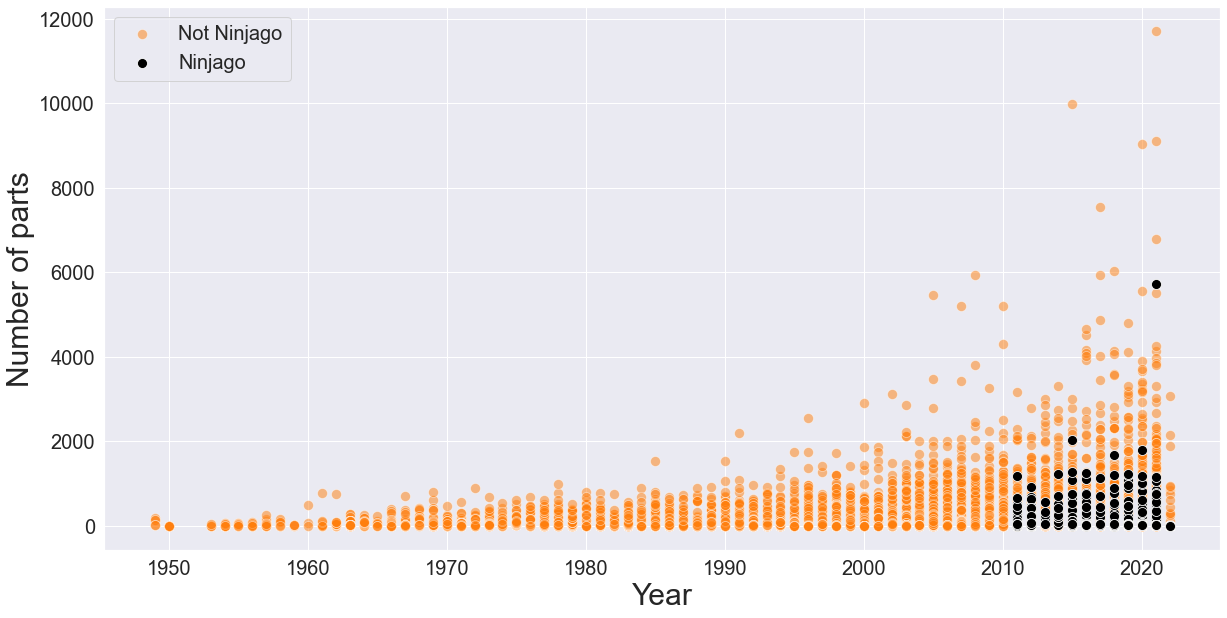

In [27]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data=df_0, x='year', y='num_parts', alpha=0.5, color='tab:orange', s=100)
sns.scatterplot(data=df_1, x='year', y='num_parts', alpha=1, color='black', s=100)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Number of parts', fontsize=30)
plt.legend(labels=['Not Ninjago','Ninjago'], fontsize=20)
plt.show()

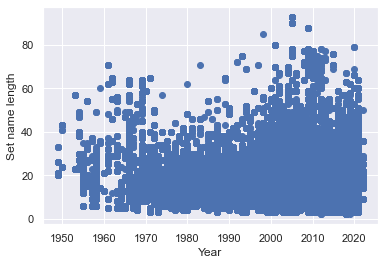

In [28]:
fig, ax = plt.subplots()
ax.scatter(df['year'], df['set_name_len'])
ax.set_xlabel('Year')
ax.set_ylabel('Set name length')
plt.show()

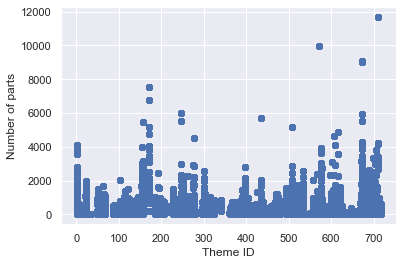

In [29]:
fig, ax = plt.subplots()
ax.scatter(df['theme_id'], df['num_parts'])
ax.set_xlabel('Theme ID')
ax.set_ylabel('Number of parts')
plt.show()

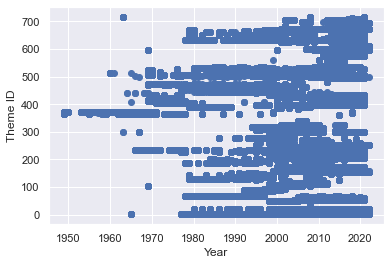

In [30]:
fig, ax = plt.subplots()
ax.scatter(df['year'], df['theme_id'])
ax.set_xlabel('Year')
ax.set_ylabel('Theme ID')
plt.show()

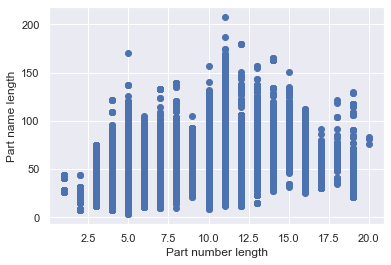

In [31]:
fig, ax = plt.subplots()
ax.scatter(df['part_num_len'], df['part_name_len'])
ax.set_xlabel('Part number length')
ax.set_ylabel('Part name length')
plt.show()

In [32]:
df.sort_values(['is_ninjago', 'year'], ascending=[False, True])

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
102654,20020-1,Mini Turbo Shredder,2011,435,83,7,19,Ninjago,7647,2540,15,1,White,Plate Special 1 x 2 Side Handle [Free Ends],0,7,4,5,43,1
102655,20020-1,Mini Turbo Shredder,2011,435,83,7,19,Ninjago,7647,3004,0,2,Black,Brick 1 x 2,0,7,4,5,11,1
102656,20020-1,Mini Turbo Shredder,2011,435,83,7,19,Ninjago,7647,3020,71,2,Light Bluish Gray,Plate 2 x 4,0,7,4,17,11,1
102657,20020-1,Mini Turbo Shredder,2011,435,83,7,19,Ninjago,7647,3021,85,2,Dark Purple,Plate 2 x 3,0,7,4,11,11,1
102658,20020-1,Mini Turbo Shredder,2011,435,83,7,19,Ninjago,7647,3023,15,2,White,Plate 1 x 2,0,7,4,5,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791066,80036-1,The City of Lanterns,2022,693,2137,7,20,Monkie Kid,118363,99780,4,4,Red,Bracket 1 x 2 - 1 x 2 Inverted,0,10,5,3,30,0
791067,80036-1,The City of Lanterns,2022,693,2137,7,20,Monkie Kid,118363,99780,28,12,Dark Tan,Bracket 1 x 2 - 1 x 2 Inverted,0,10,5,8,30,0
791068,80036-1,The City of Lanterns,2022,693,2137,7,20,Monkie Kid,118363,99781,15,2,White,Bracket 1 x 2 - 1 x 2,0,10,5,5,21,0
791069,80036-1,The City of Lanterns,2022,693,2137,7,20,Monkie Kid,118363,99781,320,2,Dark Red,Bracket 1 x 2 - 1 x 2,0,10,5,8,21,0
